<a href="https://colab.research.google.com/github/rjm135/VGG-16-test/blob/main/VGGNet_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('/content/drive/MyDrive/VGGNet')

In [ ]:
!ls -al 

total 4
drwx------ 4 root root 4096 Jun  4 06:43 VGG_reshape


In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
from IPython.display import display # 이미지 출력 함수
import numpy as np



def predict_vgg16(model, filename) :

  # 이미지 파일을 읽고 화면에 표시
  image = load_img(filename)
  # image = PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=688x550
  display(image)

  
  # 모델 사이즈로 이미지 파일을 읽기
  image = load_img(filename, target_size=(224, 224))
  # image = PIL.Image.Image image mode=RGB size=224x224

  
  # 이미지 데이터를 numpy로 변환
  image = img_to_array(image)
  # [
  #   [[211. 184. 163.]
  #   [225. 193. 170.]
  #   ...
  #   [237. 202. 180.]]
  #   ...
  # ]  
  #
  # image.shape = (224, 224, 3)

  # vgg16.preprocess_input()을 호출하기 위해 차원을 조정
  # 보통 모델을 여러 이미지를 한번에 호출. 
  # 맨 앞의 1 : 이미지 갯수가 1개라는 것.
  # 두번째 224 : 가로
  # 세번째 224 : 세로
  # 네번째 3 : R, G, B 3개
  image = image.reshape((1, 224, 224, 3))

  # VGG16 모델 호출을 위해 데이터 전처리.
  # -255 ~ 255 사이 값으로 정규화한다.
  # 그리고 RGB를 BGR순으로 바꾼다.
  image = vgg16.preprocess_input(image)
  
  
  # 이미지를 모델에 적용
  yhat = model.predict(image)
  # yhat = [[2.03485320e-06 4.21382174e-06 1.45730738e-07 1.04057870e-06
  #          6.61934010e-08 2.63145339e-04 4.49358195e-05 2.03222541e-08
  #          ... ]] # 1000개 클래스에 대한 결과값.
  #
    
    
  # 모델 적용된 결과를 파싱
  label = vgg16.decode_predictions(yhat)
  # label = [[('n02655020', 'puffer', 0.9612253), ... ]]

  # 가장 확률이 높은 결과를 획득
  label = label[0][0]
  # label = ('n02655020', 'puffer', 0.9612253)

  # 라벨과 라벨을 예측한 확률을 출력
  print('%s (%.2f%%)' % (label[1], label[2]*100))

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

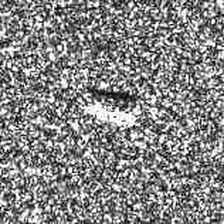

chain_mail (4.65%)


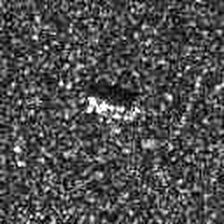

chain_mail (13.41%)


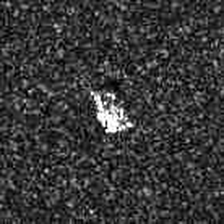

chain_mail (18.24%)


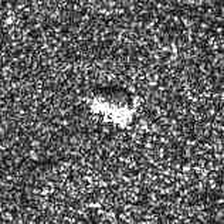

chain_mail (3.02%)


In [ ]:
from keras.applications import vgg16

# VGG16 모델을 불러오기
model = vgg16.VGG16()

# 모델의 모양을 보여준다.
model.summary()

files = [
    'VGG_reshape/Test/2S1/1.png',
    'VGG_reshape/Test/BRDM_2/1.png',
    'VGG_reshape/Test/T_72_A64/1.png',
    'VGG_reshape/Test/ZSU_23_4/1.png'
        ]

  
for file in files :
  predict_vgg16(model, file)  

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'VGG_reshape/Train'
validation_dir = 'VGG_reshape/Test'
batch_size = 32
image_size = 224

# 학습에 사용될 이미지 데이터 생성기
train_datagen = ImageDataGenerator(
      rotation_range=180, # 회전 쵀대 20도
      width_shift_range=0.2, # 좌우 이동
      height_shift_range=0.2, # 상하 이동
      horizontal_flip=True, # 좌우 반전
      vertical_flip=True, # 상하 반전
      )
 
# 검증에 사용될 이미지 데이터 생성기
validation_datagen = ImageDataGenerator()
 

# 학습에 사용될 데이터 생성기  
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# 검증에 사용될 데이터 생성기
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_num=len(train_generator.class_indices)

custom_labels = list(validation_generator.class_indices.keys())

Found 924 images belonging to 4 classes.
Found 105 images belonging to 4 classes.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers
import keras.backend as K

K.clear_session() # 새로운 세션으로 시작

from keras.applications.vgg16 import VGG16
# 모델 불러오기
conv_layers = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
conv_layers.summary()

# Convolution Layer를 학습되지 않도록 고정 
for layer in conv_layers.layers:
    layer.trainable = False


# 새로운 모델 생성하기
model = models.Sequential()

# VGG16모델의 Convolution Layer를 추가
model.add(conv_layers)
 
# 모델의 Fully Connected 부분을 재구성
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(class_num, activation='softmax'))

# 모델
model.summary()



vgg16_model_path = 'new_trained_from_vgg16.h5'

model.save(vgg16_model_path)

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
conv_layers.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 4100      
Total params: 40,409,924
Trainable params: 25,695,236
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from keras.models import load_model

# 모델 로딩
model = load_model(vgg16_model_path)

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 모델 학습
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# 모델 저장
model.save(vgg16_model_path)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
28/28 [==============================] - 379s 12s/step - loss: 31.5830 - acc: 0.3801 - val_loss: 2.1187 - val_acc: 0.5810
Epoch 2/100
28/28 [==============================] - 11s 388ms/step - loss: 8.0796 - acc: 0.5697 - val_loss: 1.1256 - val_acc: 0.8095
Epoch 3/100
28/28 [==============================] - 11s 386ms/step - loss: 6.3016 - acc: 0.5887 - val_loss: 0.8224 - val_acc: 0.8286
Epoch 4/100
28/28 [==============================] - 11s 392ms/step - loss: 5.0696 - acc: 0.6123 - val_loss: 0.8907 - val_acc: 0.7810
Epoch 5/100
28/28 [==============================] - 11s 389ms/step - loss: 4.4442 - acc: 0.5956 - val_loss: 0.4750 - val_acc: 0.8286
Epoch 6/100
28/28 [==============================] - 11s 389ms/step - loss: 3.5757 - acc: 0.6158 - val_loss: 0.4650 - val_acc: 0.8381
Epoch 7/100
28/28 [==============================] - 11s 393ms/step - loss: 2.4602 - acc: 0.6473 - val_loss: 0.5682 - val_acc: 0.8286
Epoch 8/100
28/28 [==============================] - 11s 388ms

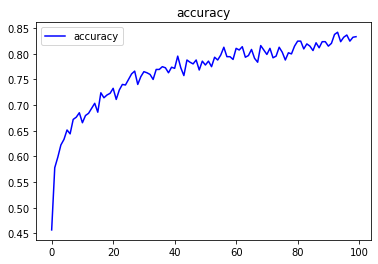

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='accuracy')
#plt.plot(epochs, loss, 'r', label='loss')
#plt.title('accuracy and loss')
plt.title('accuracy')
plt.legend()
  
plt.show()

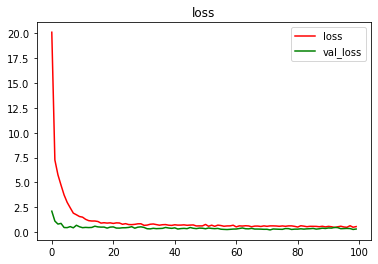

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

 
epochs = range(len(acc))
 
#plt.plot(epochs, acc, 'b', label='accuracy')
plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, val_loss, 'g', label='val_loss')
#plt.title('accuracy and loss')
plt.title('loss')
plt.legend()
  
plt.show()

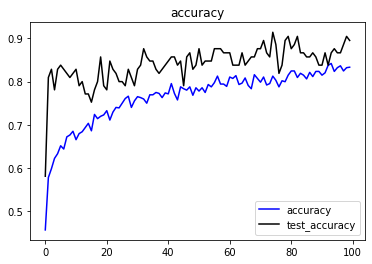

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='accuracy')
#plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, val_acc, 'k', label='test_accuracy')
#plt.title('accuracy and loss')
plt.title('accuracy')
plt.legend()
  
plt.show()

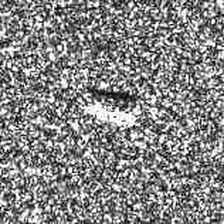

2S1 (98.85%)


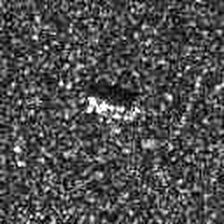

BRDM2 (100.00%)


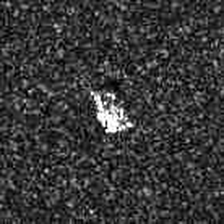

BRDM2 (100.00%)


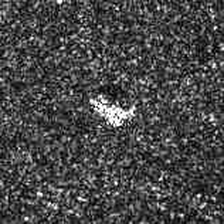

ZSU_23_4 (98.14%)


In [33]:
files = [
    'VGG_reshape/Test/2S1/1.png',
    'VGG_reshape/Test/BRDM_2/1.png',
    'VGG_reshape/Test/T_72_A64/1.png',
    'VGG_reshape/Test/ZSU_23_4/4.png'
        ]

  
for file in files :
  my_predict_vgg16(model, file)  

In [15]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import vgg16
from IPython.display import display # 이미지 출력 함수
import numpy as np

vgg16_model_path = 'new_trained_from_vgg16.h5'

# 모델 로딩
model = load_model(vgg16_model_path)

def my_predict_vgg16(model, filename) :

  # 이미지 파일을 읽고 화면에 표시
  image = load_img(filename)
  # image = PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=688x550
  display(image)

  
  # 모델 사이즈로 이미지 파일을 읽기
  image = load_img(filename, target_size=(224, 224))
  # image = PIL.Image.Image image mode=RGB size=224x224

  
  # 이미지 데이터를 numpy로 변환
  image = img_to_array(image)
  # [
  #   [[211. 184. 163.]
  #   [225. 193. 170.]
  #   ...
  #   [237. 202. 180.]]
  #   ...
  # ]  
  #
  # image.shape = (224, 224, 3)

  # vgg16.preprocess_input()을 호출하기 위해 차원을 조정
  # 보통 모델을 여러 이미지를 한번에 호출. 
  # 맨 앞의 1 : 이미지 갯수가 1개라는 것.
  # 두번째 224 : 가로
  # 세번째 224 : 세로
  # 네번째 3 : R, G, B 3개
  image = image.reshape((1, 224, 224, 3))

  # VGG16 모델 호출을 위해 데이터 전처리.
  # -255 ~ 255 사이 값으로 정규화한다.
  # 그리고 RGB를 BGR순으로 바꾼다.
  image = vgg16.preprocess_input(image)
  
  
  # 이미지를 모델에 적용
  yhat = model.predict(image)
  # yhat = [[2.03485320e-06 4.21382174e-06 1.45730738e-07 1.04057870e-06
  #          6.61934010e-08 2.63145339e-04 4.49358195e-05 2.03222541e-08
  #          ... ]] # 1000개 클래스에 대한 결과값.
  
  #print(yhat)
  #yhat=np.argmax(yhat)
  #print(yhat)
  class_name={0: '2S1', 1: 'BRDM2', 2: 'T_72_A64', 3: 'ZSU_23_4'}    
  #print(calss_name[0])
  label=class_name[np.argmax(yhat)]
  #yhat_reverse = yhat[np.argsort(-yhat)]
  yhat_1=np.max(yhat)
  # 모델 적용된 결과를 파싱
  #label = vgg16.decode_predictions(yhat, top=3)
  #yhat = np.argmax(yhat[0])
  #print(label)
  # label = [[('n02655020', 'puffer', 0.9612253), ... ]]

  # create a list containing the class labels
  #class_labels = ['2S1', 'BRDM-2', 'T-72 A64', 'ZSU-23/4']
  #label = np.argmax(class_labels, axis=-1)
  # find the index of the class with maximum score
  #pred = np.argmax(class_labels, axis=-1)

  # print the label of the class with maximum score
  #print(class_labels[pred[0]])


  # 가장 확률이 높은 결과를 획득
  #yhat=np.argmax(yhat)
  #label = yhat
  #label = label[0][0]
  # label = ('n02655020', 'puffer', 0.9612253)
  #print(label)
  # 라벨과 라벨을 예측한 확률을 출력
  print('%s (%.2f%%)' % (label, yhat_1*100))